# Conjugate gradient: convergence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import cg
from scipy.stats.mstats import gmean
from scipy.special import eval_chebyt 

# Example 6.14

In [7]:
n = 100
# one dimensional finite difference matrix
A1d = np.diag(2*np.ones(n)) + np.diag(-1*np.ones(n-1),-1)+ np.diag(-1*np.ones(n-1),1)

# two dimensional finite difference matrix
A2d = np.kron(np.eye(n),A1d) + np.kron(A1d, np.eye(n))

# random vector as right hand side
b = np.random.rand(n**2)

In [25]:
# Eigenvalues and condition number
lambdas = [2*(1.0-np.cos(np.pi*j/(n+1))) for j in range(1,n+1)]
kappa = lambdas[-1]/lambdas[0]

l2d = np.zeros(n**2)
k = 0
for i in range(0,n):
    for j in range(0, n):
        l2d[k] = lambdas[i]+lambdas[j]
        k = k+1
l2d = np.sort(l2d)


In [26]:
class cg_counter(object):
    def __init__(self, A, b, disp=True):
        self._disp = disp
        self.niter = 0
        self.A = A
        self.b = b
        self.rk = []
    def __call__(self, xk=None):
        self.niter += 1
        if self._disp:
            rk = self.b-self.A.dot(xk) 
            #print('iter %3i\trk = %s' % (self.niter, str(rk)))      
            self.rk.append(rk)

In [27]:
m1 = 1
D1 = np.diag(np.hstack((l2d[:m1],gmean(l2d[m1:(n**2-m1)])*np.ones(n**2-2*m1), l2d[-m1:]) ))

m2 = 5
D2 = np.diag(np.hstack((l2d[:m2],gmean(l2d[m2:(n**2-m2)])*np.ones(n**2-2*m2), l2d[-m2:]) ))

m3 = 20
D3 = np.diag(np.hstack((l2d[:m3],gmean(l2d[m3:(n**2-m3)])*np.ones(n**2-2*m3), l2d[-m3:]) ))

m4 = 40
D4 = np.diag(np.hstack((l2d[:m4],gmean(l2d[m4:(n**2-m4)])*np.ones(n**2-2*m4), l2d[-m4:]) ))

m5 = 100
D5 = np.diag(np.hstack((l2d[:m5],gmean(l2d[m5:(n**2-m5)])*np.ones(n**2-2*m5), l2d[-m5:]) ))

m6 = 200
D6 = np.diag(np.hstack((l2d[:m6],gmean(l2d[m6:(n**2-m6)])*np.ones(n**2-2*m6), l2d[-m6:]) ))

m7 = 5000
D7 = np.diag(np.hstack((l2d[:m7],gmean(l2d[m7:(n**2-m7)])*np.ones(n**2-2*m7), l2d[-m7:]) ))

In [11]:
counter_A2d = cg_counter(A2d, b)
x, info = cg(A2d, b, tol=10**(-13), maxiter=200, callback=counter_A2d)

counter_D1 = cg_counter(D1, b)
xD1, info = cg(D1, b, tol=10**(-13), maxiter=200, callback=counter_D1)

counter_D2 = cg_counter(D2, b)
xD2, info = cg(D2, b, tol=10**(-13), maxiter=200, callback=counter_D2)

counter_D3 = cg_counter(D3, b)
xD3, info = cg(D3, b, tol=10**(-13), maxiter=200, callback=counter_D3)

counter_D4 = cg_counter(D4, b)
xD4, info = cg(D4, b, tol=10**(-13), maxiter=200, callback=counter_D4)

counter_D5 = cg_counter(D5, b)
xD5, info = cg(D5, b, tol=10**(-13), maxiter=200, callback=counter_D5)

counter_D6 = cg_counter(D6, b)
xD6, info = cg(D6, b, tol=10**(-13), maxiter=200, callback=counter_D6)

counter_D7 = cg_counter(D7, b)
xD7, info = cg(D7, b, tol=10**(-13), maxiter=200, callback=counter_D7)


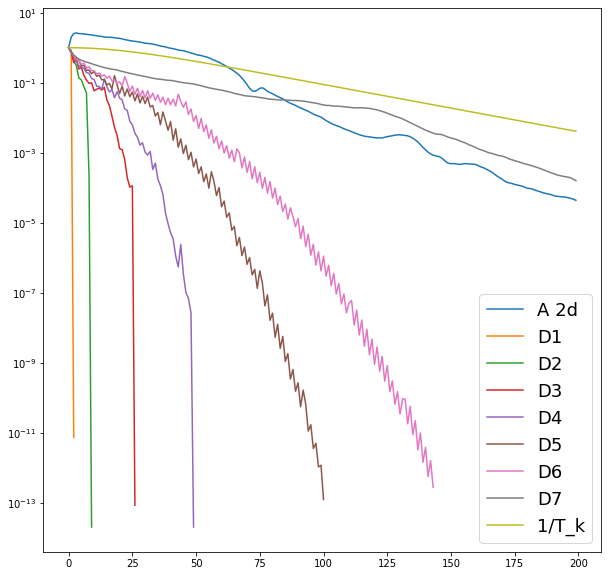

In [34]:
def rkoverr0(rk):
    return [(np.linalg.norm(rk[i]))/(np.linalg.norm(rk[0])) for i in range(len(rk)) ]
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.semilogy(range(len(counter_A2d.rk)), rkoverr0(counter_A2d.rk) , label='A 2d')
ax.semilogy(range(len(counter_D1.rk)) , rkoverr0(counter_D1.rk) , label='D1')
ax.semilogy(range(len(counter_D2.rk)) , rkoverr0(counter_D2.rk) , label='D2')
ax.semilogy(range(len(counter_D3.rk)) , rkoverr0(counter_D3.rk) , label='D3')
ax.semilogy(range(len(counter_D4.rk)) , rkoverr0(counter_D4.rk) , label='D4')
ax.semilogy(range(len(counter_D5.rk)) , rkoverr0(counter_D5.rk) , label='D5')
ax.semilogy(range(len(counter_D6.rk)) , rkoverr0(counter_D6.rk) , label='D6')
ax.semilogy(range(len(counter_D7.rk)) , rkoverr0(counter_D7.rk) , label='D7')

ax.semilogy(range(200), [1.0/eval_chebyt(n, 1+2.0/(kappa-1)) for n in range(200)], label='1/T_k' )
ax.legend(loc=4,prop={'size': 18})
plt.show()

